In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
os.getcwd()

'D:\\OneDrive - Manipal Global Education Services Pvt Ltd\\Official\\MGAIT\\IPBA\\NLP\\Final demos\\casestudy'

In [3]:
os.chdir(r"D:\OneDrive - Manipal Global Education Services Pvt Ltd\Official\MGAIT\Datasets")

In [5]:
#!pip install nltk

In [6]:
#!pip install wordcloud

In [4]:
import nltk

In [8]:
#nltk.download()

In [5]:
reviews = pd.read_csv("K8 Reviews v0.2.csv")

In [10]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [11]:
#Dataset is scrapped from Amazon for Lenovo K8 mobile phones
# Review in the form of free text was scrapped and the user rating
# A user rating of 1,2,3 -> sentiment 0
# A user rating of 4 and 5 -> sentiment 1

In [12]:
reviews.shape

(14675, 2)

In [13]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

Getting insignts from the reviews:

        1. Use resular expressions
        2. Word cloud
        3. Bar graph

## Use resular expressions to get insignts about the reviews

In [14]:
#1. Find out the Reviews Which have some numbers followed by the gb

In [15]:
count=0
for review in reviews.review.values:
    review = review.strip()
    result = re.search("[0-9]+gb",review)
    if result:
        print(review)
        count+=1

Nice performance with 4gb RM and 64gb inbuilt memory
very bad and when lenovo and moto merged the standard of lenovo went to a worst condition. the 4gb decacore do nothing....dont buy it. very bad.....
Very nice looking phone.. Nice build quality... Awesome product ... In this price range it is a best phone... Nice bettory life and fast charging... It has all specifications ... Dual camera... Nice fingerPrint scanner... Awesome work with 4gb/64gb combination... Realy value for money...
It gets very hot while using. I was using Lenovo K4 for last one year and was more satisfied with that rather this one @ 13999. Main drawback of this phone arebeautiful_ Cast (screen mirror) doesn't work. Bluetooth is also disturbing. Touch screen is not as sensitive as it should be with 4gb ram and 64 GB internal memory with 10 core processer. Display got broken very early with in two months of use. It's very normal and not as strong as k4. Hand grip is not good. Voice clarity not good and Dolby sound i

In [16]:
print(count)

81


In [17]:
reviews.review.values[100]

'Product is good. Purchased on sep-17 and got cash back on 25Dec17. what a way to make fool, they called it cash back.lol'

In [18]:
#1. Find out the Reviews Which have some numbers followed by the /-

In [19]:
count=0
for review in reviews.review.values:
    review = review.strip()
    result = re.search("[0-9]+/-",review)
    if result:
        print(review)
        count+=1

Firstly product not delivered on time dissatisfied 2 weeks.Secondly Android 7.1.1 naugat doesn't have call recording optionThirdly when selling product cost was 13999/- now why drastically dropped. 10999/-Fourthly when talking over the phone feels like nerve pulling to much radiation need immediate fix on this matter as it's safety and security of customer.Fifthly if any issues in hardware issues please let us know the service centers location. And please ensure hardware availability should be there at any time when customers booked.Finally as discribed about product all features are ok no issues found as mentioned earlier if call recording option would have added the this product would have been met the expectations.Camera quality is good not bad snap attached.
Bad quality of screen.Mobile was just fall from 1 ft. of height & screen was brokenCustomer care of Lenovo Jabalpur (MP) is not responding regarding the replacement of screen even on paid service basis. I have deposited Rs. 420

In [20]:
print(count)

28


### Get the word cloud:

    1. combine all the reviews into a single string
    2. instantiate word cloud
    3. generate the word cloud

In [21]:
from wordcloud import WordCloud

In [22]:
reviews_combined = " ".join(reviews.review.values)

In [23]:
#Understanding join
lst = ["A","B","C"]
" ".join(lst)

'A B C'

In [24]:
len(reviews_combined)

1674772

In [25]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [26]:
word_cloud = WordCloud().generate(reviews_combined)

In [27]:
word_cloud = WordCloud(width=800,height=800,
                       background_color='white',
                       max_words=150).\
generate(reviews_combined)

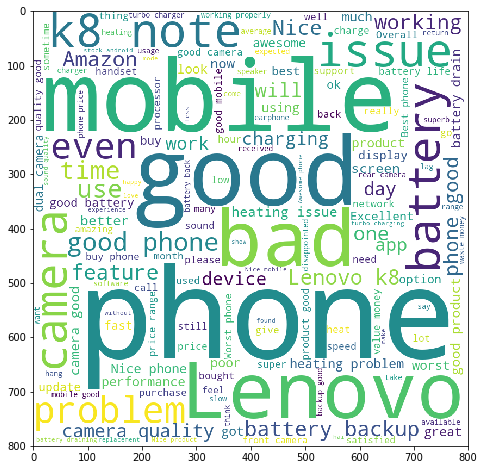

In [28]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

## Bar graph of top 25 used words

1. get the words and the frequencies
2. sort based on frequencies and get the top 25 words
3. plot the bar graph

In [29]:
from nltk.probability import FreqDist
all_terms = reviews_combined.split(" ")
fdist = FreqDist(all_terms)

In [30]:
fdist

FreqDist({'is': 10151, 'the': 5565, 'not': 5162, 'and': 5078, 'phone': 4766, 'to': 4627, 'this': 3833, 'in': 3445, 'I': 3418, 'good': 3348, ...})

In [31]:
#From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(), columns = ["words","freq"])

In [32]:
df_dist.head()

,words,freq
0,Good,1315
1,but,2222
2,need,196
3,updates,98
4,and,5078


In [33]:
#Top 5 words based on frequency
df_dist.sort_values(ascending=False, by="freq").head(5)

,words,freq
13,is,10151
94,the,5565
41,not,5162
4,and,5078
91,phone,4766


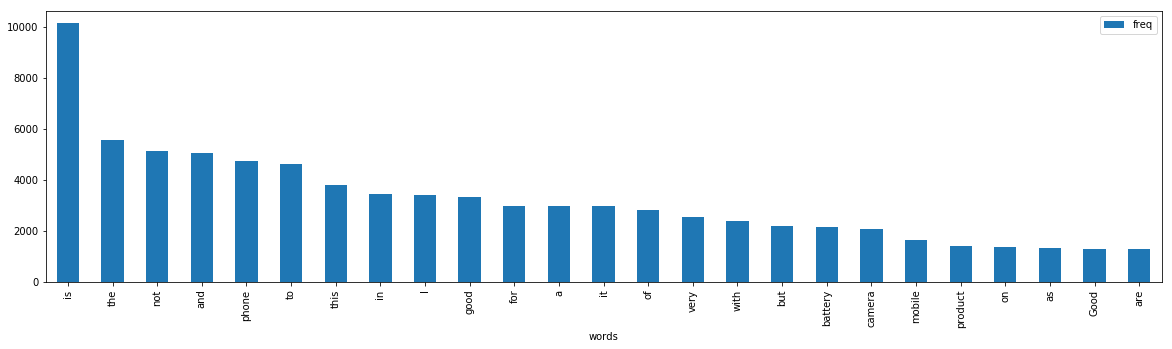

In [34]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with these visuals:

    1.Too many distinct words in the corpus of reviews
        1.Text is non unifrom case
        2.Punctuations present in the text
        3.There are language connectors in the text - stop words
        4.Words with different forms/tenses - charge, charged, charging

Basic Text processing tasks:
    1. Text cleaning
    2. Get the visuals - word cloud and bar graph or frequency graph
    3. Converting text to numeric matrices
    4. Advanced visuals using collocations(n-grams - unigrams, bigrams, trigrams)
    5. Sentiment analysis and sentiment classification
    6. text classification
    7. document clustering

In [35]:
from nltk.tokenize import word_tokenize

In [36]:
all_terms = word_tokenize(reviews_combined.lower())

In [37]:
print(all_terms[:200])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', ',', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged.this', 'is', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'is', 'not', 'at', 'all', 'expected', ',', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000mah', '&', 'booster', 'charger', 'is', 'fake', ',', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged.do', "n't", 'know', 'how', 'lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us.please', 'don', ';', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me', '.', 'when', 'i', 'will', 'get', 'my', '10', '%', 'cash', 'back', '...', '.', 'its', 'already', '15', 'january..', 'good', 'the', 'worst', 'phone', 'everthey', 'have

In [38]:
len(set(all_terms))

19159

In [39]:
from nltk.probability import FreqDist

In [40]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

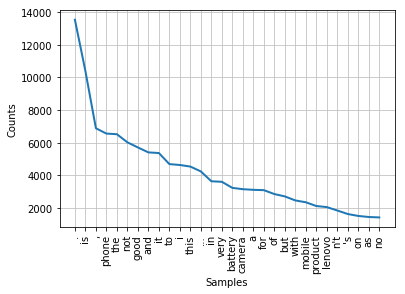

In [41]:
fdist.plot(30)
plt.show()

The head and the tail of the above graph consists of either punct or stop words which needs to be removed

In [42]:
# Remove Every thing other than alphabets, numbers and space

In [43]:
reviews_combined_clean = re.sub("[^\w\s]+","",reviews_combined)
all_terms = word_tokenize(reviews_combined_clean.lower())

In [44]:
len(set(all_terms))

18818

In [45]:
from nltk.corpus import stopwords

In [46]:
stop_nltk = stopwords.words("english")

In [47]:
stop_updated = stop_nltk + ["mobile","phone","lenovo","k8","note"]

In [48]:
reviews_updated1 = [term for term in all_terms if term not in stop_updated and len(term)>2]

In [49]:
len(set(reviews_updated1))

18297

In [50]:
print(reviews_updated1[:200])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'dischargedthis', 'biggest', 'lie', 'amazon', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'chargeddont', 'know', 'survive', 'making', 'full', 'usplease', 'dont', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'amazon', 'returning', 'highly', 'disappointing', 'amazon', 'telling', 'dont', 'buyim', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allotreally', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problemsand', 'hanging', 'problems', 'noteso', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', '

In [51]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [52]:
reviews_updated_stem = [ stemmer_s.stem(word) for word in reviews_updated1]

In [53]:
print(len(set(reviews_updated_stem)))

15939


stemmer reduces the number of distinct words in the corpus to a greater exten

lets build a udf

- input : review 
- Tasks : All the above cleaning steps
- Return : string of cleaned reveiw

based on the outcome of this function, you should be able to add a new column in the data frame called as "cleaned_review"

In [54]:
def clean_txt(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub(r"[^\w\s]","",result)
    tokens = word_tokenize(result1.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens \
               if term not in stop_updated and \
               len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [55]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [56]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi januari
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...


# Word cloud on cleaned dataset

In [57]:
reviews_combined_clean = " ".join(reviews.clean_review.values)

In [58]:
reviews_combined_clean[:500]

'good need updat improv worst bought ever batteri drain like hell backup hour internet use even put idl get dischargedthi biggest lie amazon lenov expect make full say batteri 4000mah booster charger fake take least hour fulli chargeddont know surviv make full uspleas dont els regret like get cash back alreadi januari good worst everthey chang last problem still amazon return high disappoint amazon tell dont buyim total disappointedpoor batterypoor camerawast money awesom charg heat allotr genuin'

In [59]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined_clean)

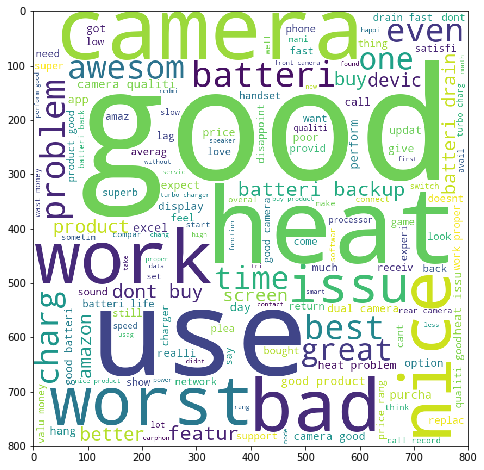

In [60]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

# Bar Graph on top 25 words

In [61]:
from nltk.probability import FreqDist
all_terms = word_tokenize(reviews_combined_clean)
fdist = FreqDist(all_terms)

In [62]:
fdist

FreqDist({'good': 5636, 'batteri': 3178, 'camera': 3160, 'product': 2172, 'heat': 1971, 'work': 1748, 'charg': 1709, 'use': 1701, 'problem': 1493, 'issu': 1447, ...})

In [63]:
#From the dict obtain a data frame of words and freq's
df_dist = pd.DataFrame(fdist.items(), columns = ["words","freq"])

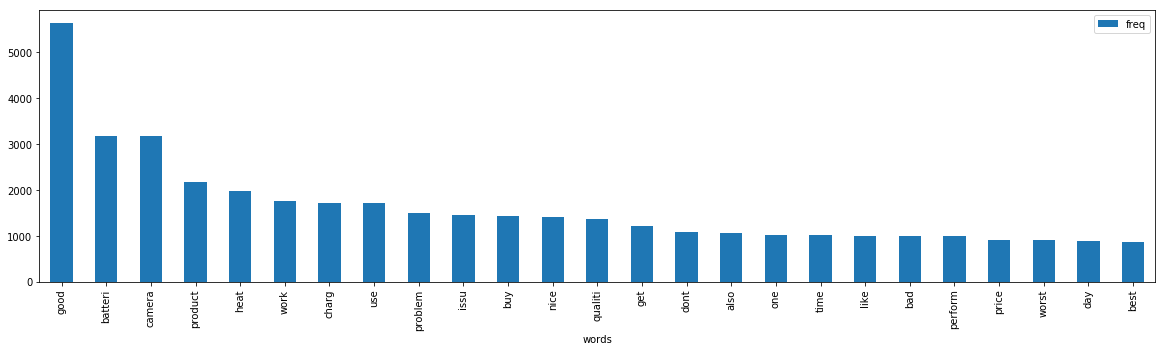

In [64]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

# Plot the bar graph for top 25 frequenctly used bigrams

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features=150)

In [67]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [68]:
print(bigram_count_vectorizer.get_feature_names()[:20])

['4000 mah', '4gb ram', 'also good', 'back camera', 'backup good', 'bad experi', 'bad product', 'batteri back', 'batteri backup', 'batteri charg', 'batteri drain', 'batteri get', 'batteri good', 'batteri heat', 'batteri last', 'batteri life', 'batteri perform', 'batteri problem', 'best price', 'build qualiti']


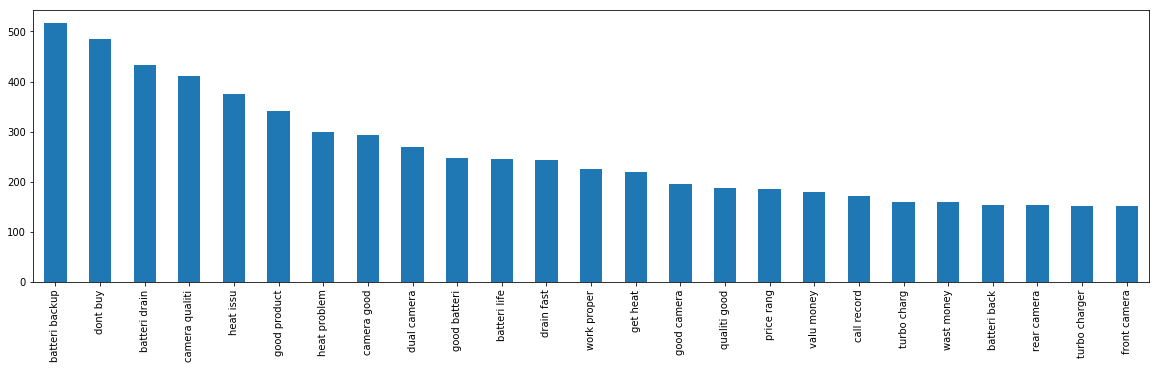

In [69]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5))  

# Sentiment Classification

### Sentiment Prediction: Building our own model based on the Sentiment labels

- Step1: get the X and y
- Step2: converting text to numbers (countvectorizer or tfidfvectorizer)
- Step3: Split into test and train
- Step4: train the model
- Step5: test and get the accuracy scores
- Step6: Make predictions for an Input Review

In [132]:
#Create a document term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [164]:
count_vect = CountVectorizer()

In [134]:
X_text = reviews.clean_review.values
y = reviews.sentiment.values

In [165]:
#Extract the features on the reviews for train - fit
#Compute the count of every word extarcted in every document(review)
X = count_vect.fit_transform(X_text)

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,
                                                 random_state=42)

In [137]:
from sklearn.metrics import accuracy_score

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logreg = LogisticRegression()

In [140]:
logreg.fit(X_train,y_train)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
y_test_pred = logreg.predict(X_test)

In [192]:
accuracy_score(y_test, y_test_pred)

0.8491937315466728

In [211]:
#Make Predictions:
review1 = "This is a fantastic mobile really like it but the battery drains fast"
review2 = "Camera is good but when I speak over phone continuously over long time it gets heated up"

In [230]:
review = [review1,review2]

In [233]:
c_review = list(map(clean_txt, review))

In [234]:
X_test_new = count_vect.transform(c_review)

In [235]:
y_test_pred_new = logreg.predict(X_test_new)

In [224]:
y_test_pred_new

array([1, 0], dtype=int64)

In [114]:
from sklearn.naive_bayes import MultinomialNB

In [115]:
nb = MultinomialNB()

In [116]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [117]:
y_test_pred = nb.predict(X_test)

In [118]:
accuracy_score(y_test, y_test_pred)

0.8355666590960709

In [236]:
from sklearn.svm import SVC

In [237]:
svc = SVC()

In [238]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [239]:
y_test_pred = svc.predict(X_test)

In [240]:
accuracy_score(y_test, y_test_pred)

0.8455598455598455